In [27]:
from nearline_helpers import *

In [28]:
f = r.TFile("../bin/run00306_00000.mid.root")
t = f.Get('tree')
t.Print()

******************************************************************************
*Tree    :tree      : tree                                                   *
*Entries :     9405 : Total =        88397292 bytes  File  Size =   41242227 *
*        :          : Tree compression factor =   2.14                       *
******************************************************************************
*Br    0 :waveforms_raw : Int_t waveforms_raw_                               *
*Entries :     9405 : Total  Size=     104373 bytes  File Size  =      20712 *
*Baskets :        4 : Basket Size=      32000 bytes  Compression=   3.65     *
*............................................................................*
*Br    1 :waveforms_raw.fUniqueID : UInt_t fUniqueID[waveforms_raw_]         *
*Entries :     9405 : Total  Size=     134095 bytes  File Size  =      57783 *
*Baskets :        5 : Basket Size=     412160 bytes  Compression=   2.31     *
*...................................................

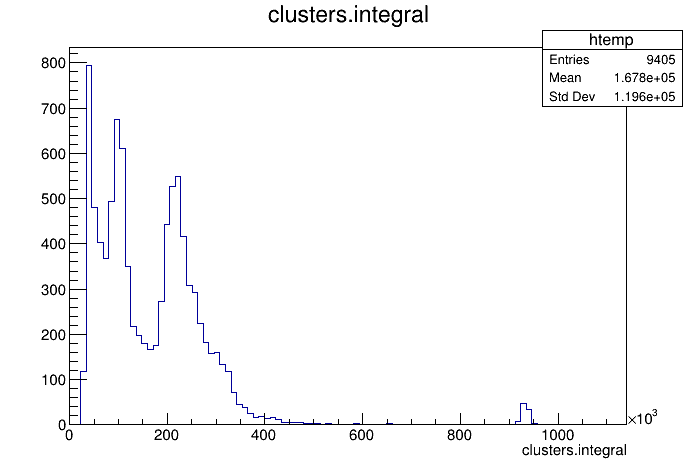

In [29]:
c = r.TCanvas()
t.Draw("clusters.integral")
c.Draw()

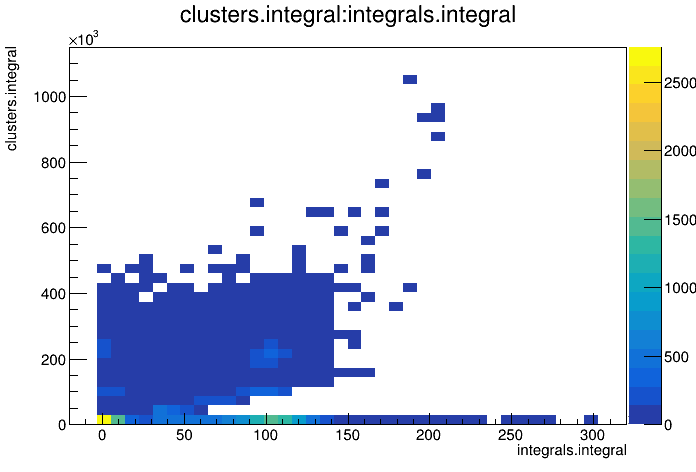

In [30]:
c = r.TCanvas()
t.Draw("clusters.integral:integrals.integral","","colz")
c.Draw()

In [31]:
for i, e in enumerate(t):
    cluster_sum = e.clusters[0].integral
    ints = [x.integral for x in e.integrals]
    wf_sum = np.sum(ints)
    if np.abs(cluster_sum-wf_sum > 0):
        print(cluster_sum-wf_sum, ints, cluster_sum)
    # if(i > 10):
    #     break

In [32]:
for i, e in enumerate(t):
    cluster_sum = e.clusters[0].integral
    ints = [x.integral for x in e.integrals]
    wf_sum = np.sum(ints)
    print(cluster_sum-wf_sum, ints, cluster_sum)
    if(i > 10):
        break

0.0 [112905.33333333331, 10583.666666666686, 3788.0666666666657, 124013.39999999997] 251290.46666666662
0.0 [70125.20000000001, 99467.40000000002, 1891.6000000000058, 103029.93333333335] 274514.1333333334
0.0 [40180.666666666686, 97114.23333333328] 137294.89999999997
0.0 [5936.0, 146835.73333333328, 50544.40000000002, 104900.33333333337] 308216.4666666667
0.0 [35551.333333333314] 35551.333333333314
0.0 [75530.20000000001] 75530.20000000001
0.0 [129303.6333333333, 5487.666666666657, 88583.79999999999, 125270.33333333331] 348645.43333333323
0.0 [94046.39999999997, 3141.5333333333256, 102962.73333333334] 200150.66666666663
0.0 [74394.0] 74394.0
0.0 [12076.599999999977, 79265.36666666664] 91341.96666666662
0.0 [2916.8000000000175, 124084.63333333336] 127001.43333333338
0.0 [98545.0, 25093.0, 105451.60000000003] 229089.60000000003


In [33]:
n = t.Draw("Entry$","integrals.integral > 100000 && clusters.integral < 1000","")
n

0

In [34]:
t.GetEntry(0)

13991

In [35]:
t.integrals

<cppyy.gbl.std.vector<dataProducts::WaveformIntegral> object at 0x557528b65b60>

In [36]:
t.clusters[0].Show()


IntegralCluster:
    run: 306
    subrun: 0
    event: 0
    eventNum: 0
    summed amplitude: 251290
    summed integral: 251290
    summed (full) integral: 255065



In [37]:
t.integrals

<cppyy.gbl.std.vector<dataProducts::WaveformIntegral> object at 0x557528b65b60>

In [38]:
t.clusters.size()

1

In [39]:
cluster = t.clusters[0]
cluster.Show()


IntegralCluster:
    run: 306
    subrun: 0
    event: 0
    eventNum: 0
    summed amplitude: 251290
    summed integral: 251290
    summed (full) integral: 255065



Name: dataProducts::WaveformIntegral Title: 


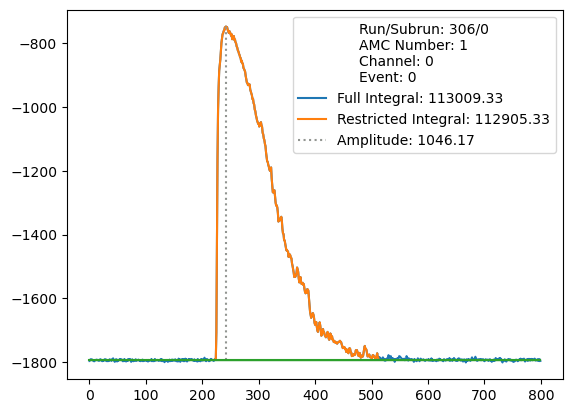

Name: dataProducts::WaveformIntegral Title: 


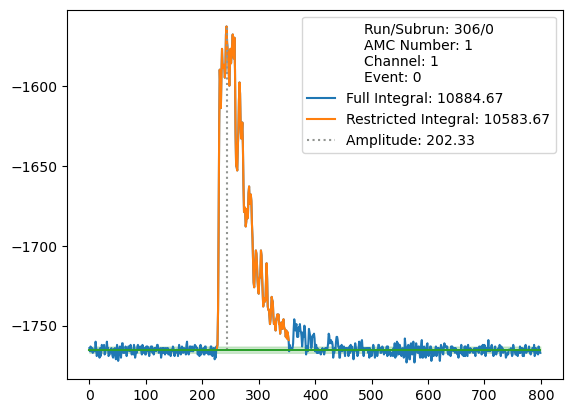

Name: dataProducts::WaveformIntegral Title: 


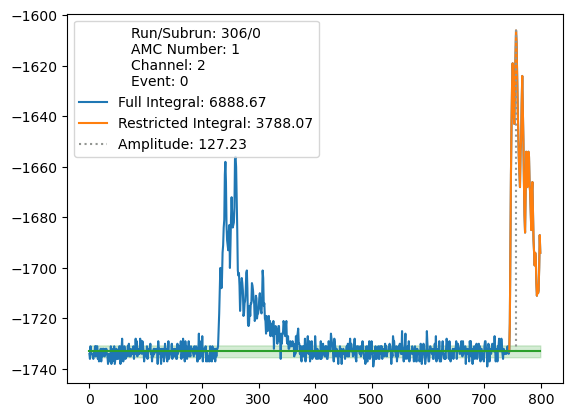

Name: dataProducts::WaveformIntegral Title: 


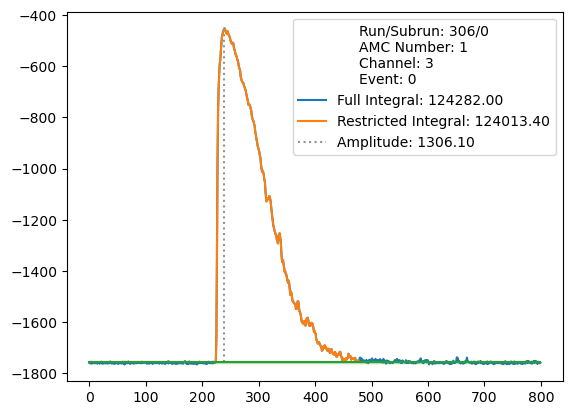

In [40]:
for xtal in cluster.xtals:
    print(xtal)
    plot_integral(xtal)
    plt.show()

In [41]:
t.integrals.size()

4

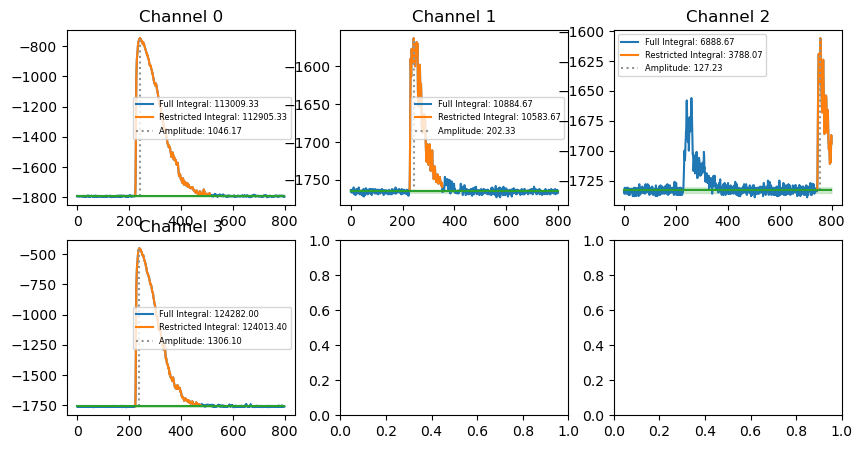

In [42]:
fig,ax = plt.subplots(2,3,figsize=(10,5))
for i, wfi in enumerate(t.integrals):
    axi = ax.ravel()[i]
    plot_integral(wfi,ax=axi)
    axi.legend(fontsize=6)
    axi.set_title(f'Channel {wfi.channelTag}')
plt.show()